In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Introduction

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

# Import Data

In [2]:
heart_data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [6]:
#Size of dataset
heart_data.shape

(303, 14)

In [7]:
#Check for null values
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

* We do not have any null values.

In [8]:
heart_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


* It is important to understand the data

In [9]:
heart_data["caa"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

# Visualization
* To see distrubution of data better
* To see outliers, if any
* What wonder i about data?

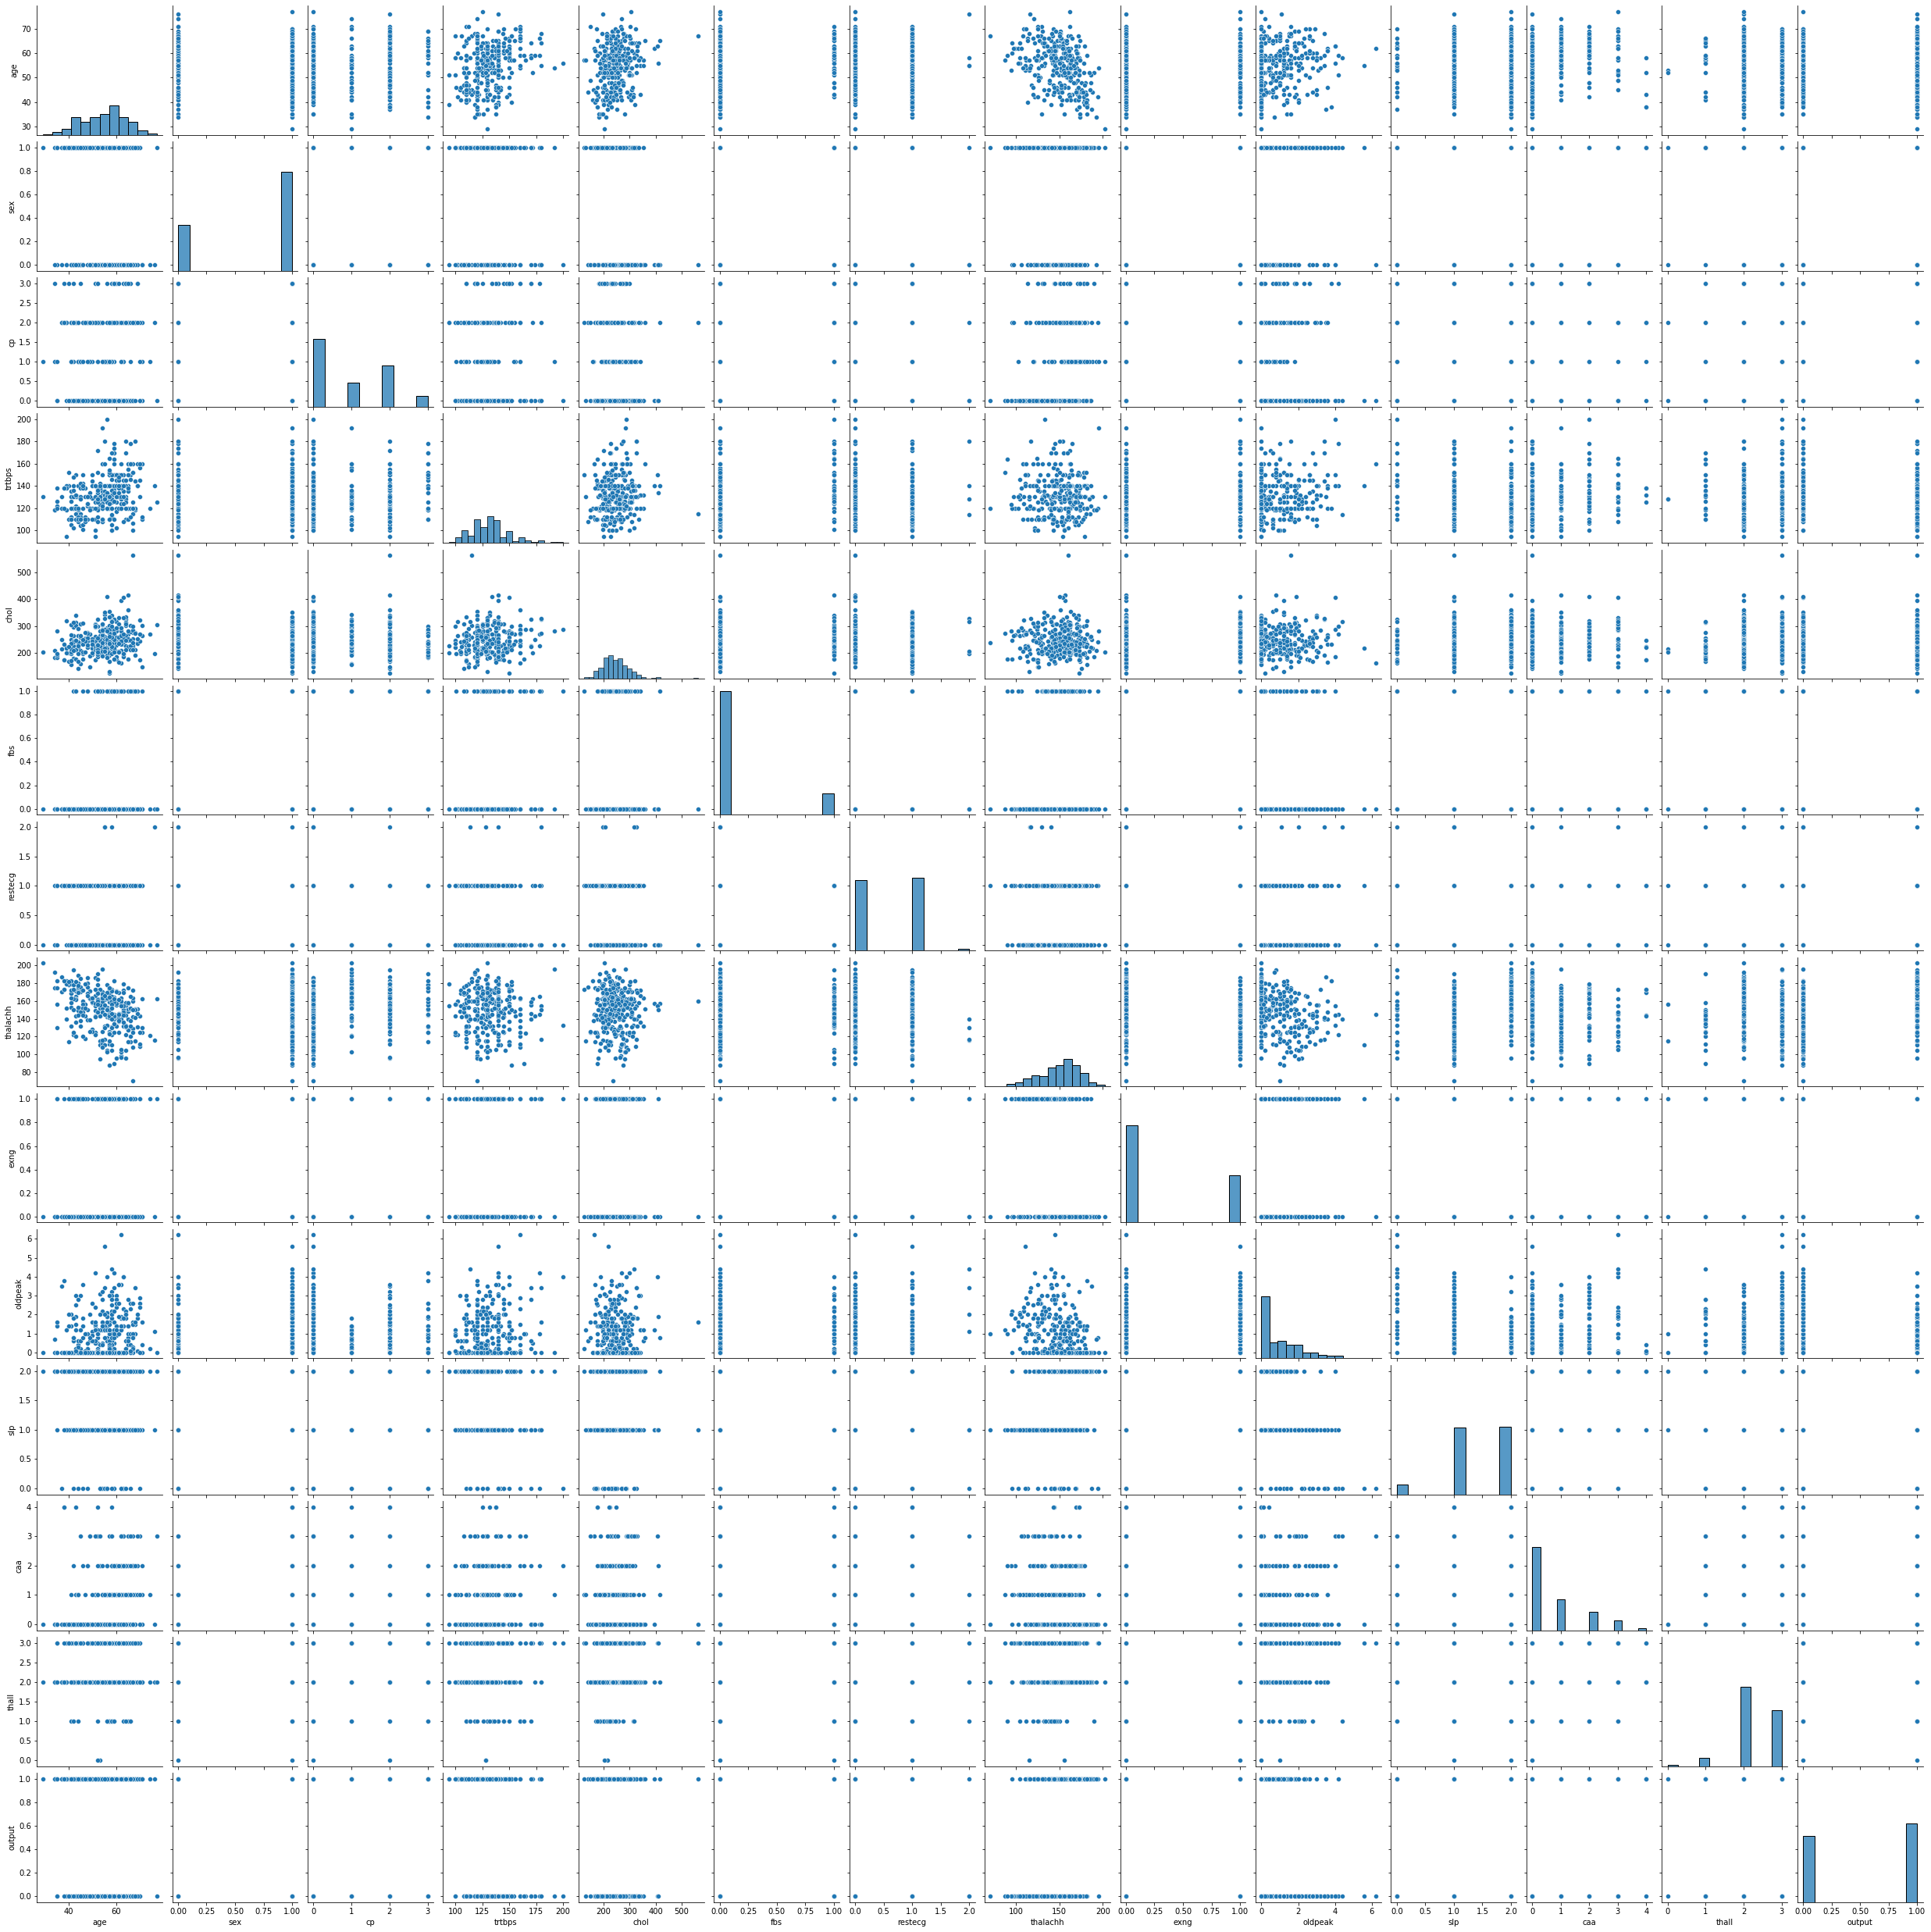

In [10]:
sns.pairplot(heart_data)

<AxesSubplot:xlabel='chol', ylabel='age'>

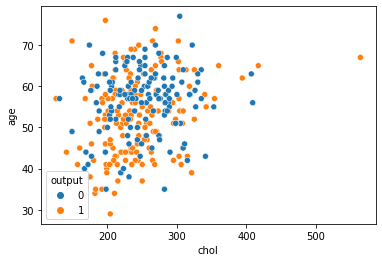

In [11]:
sns.scatterplot(x="chol",y="age",data=heart_data,hue="output")

* we have outliers

* It is hard to write scatter plot each time for all columns. For loop will be more useful

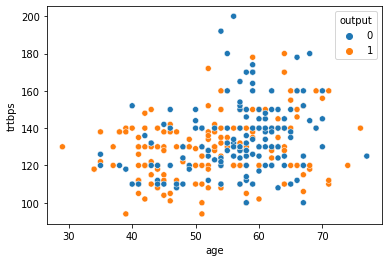

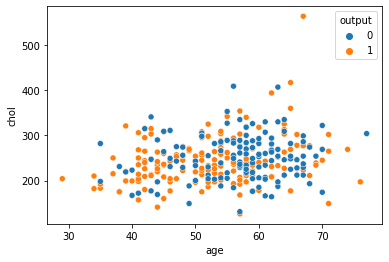

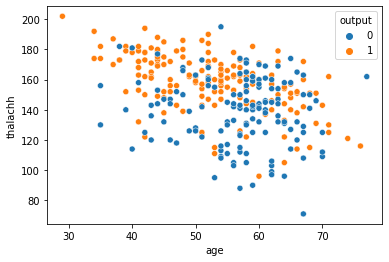

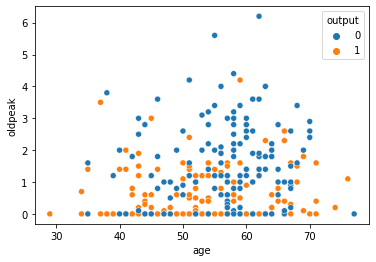

In [12]:
data_column=heart_data.drop(["age","fbs","sex","cp","restecg","exng","slp","caa","thall","output"],axis=1)
list=data_column.columns
for i in  list:
    sns.scatterplot(x="age",y=i,data=heart_data,hue="output")
    plt.show()
    


* By looking at the scatter plot, we can understand that it will not be efficient to use logistic regression on this dataset.

In [13]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


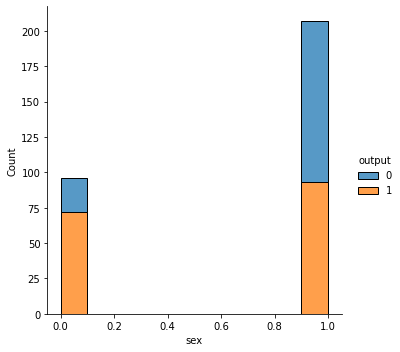

In [14]:
#en çok kadın mı erkek için mi tehlikeli
sns.displot(heart_data,x="sex",hue="output",multiple="stack")

In [15]:
heart_data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

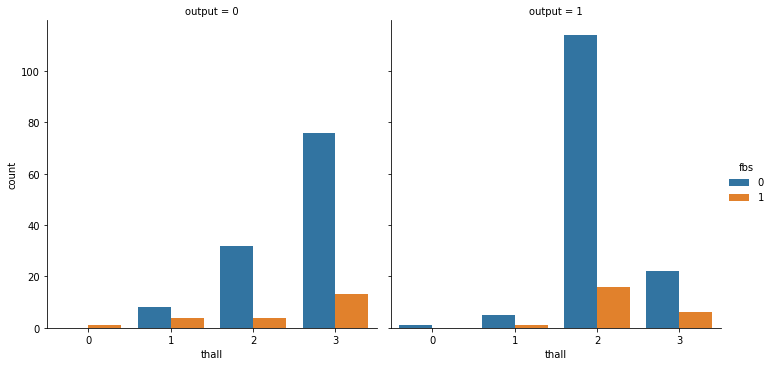

In [16]:
#fbs 120 den fazla olanların(1) ve chol kalp krizine etkisi
#Use catplot() to combine a countplot() and a FacetGrid. This allows grouping within additional categorical variables. 
#Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:
ax=sns.catplot(x="thall",hue="fbs",col="output",kind="count",data=heart_data)


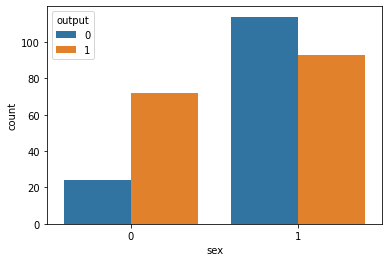

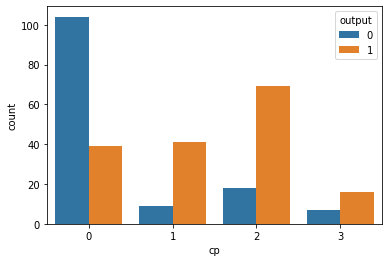

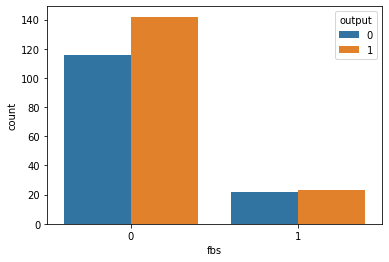

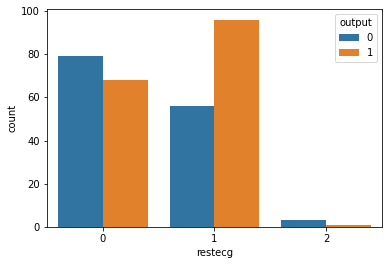

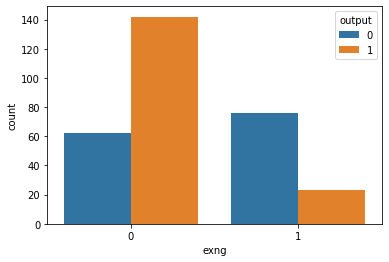

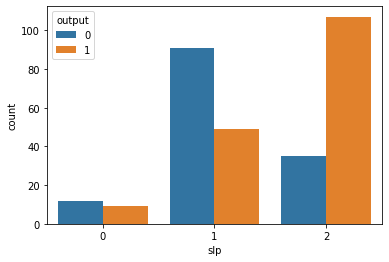

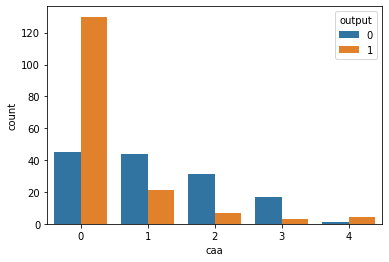

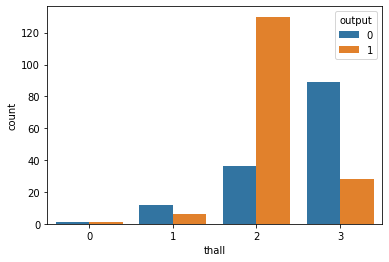

In [17]:
hd_columns=heart_data.drop(["output","age","trtbps","chol","thalachh","oldpeak"],axis=1)
columns=hd_columns.columns
for i in columns:
    ax=sns.countplot(x=i,hue="output",data=heart_data)
    plt.show()

# Outlier Detection

In [18]:
max_threshold=heart_data["chol"].quantile(0.99)
max_threshold

406.74000000000024

In [19]:
heart_data[heart_data["chol"]>max_threshold]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [20]:
min_threshold=heart_data["chol"].quantile(0.01)
min_threshold

149.0

In [21]:
df=heart_data[(heart_data["chol"]<max_threshold) & (heart_data["chol"]>min_threshold)]
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [22]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1


In [23]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler
df_s=df.copy()

In [25]:
X=df_s.drop(["output"],axis=1)
Y=df_s["output"]

In [26]:
#split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
prdes=model.predict(X_test)


<AxesSubplot:>

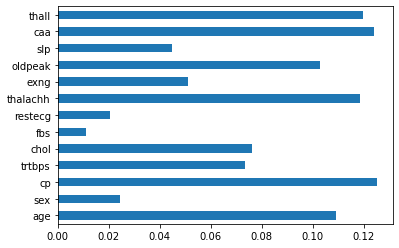

In [28]:
import matplotlib.pyplot as plt
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
feature_imp.plot(kind='barh')
#feature_imp.nlargest(10), if you have lots of features.

In [29]:
#list=df[["age","trtbps","chol","thalachh"]]#get multiple columns
#for i in list:
   # df_s[i]=StandardScaler().fit_transform(df_s[[i]])
#scaler=StandardScaler()
#X_s=pd.DataFrame(scaler.fit_transform(X))#dataframesiz array şeklinde oluyor.
    
    



## feature selection

In [30]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [32]:
best_features=feature_imp.nlargest(8).index
best_features

Index(['cp', 'caa', 'thall', 'thalachh', 'age', 'oldpeak', 'chol', 'trtbps'], dtype='object')

In [33]:
X_reduced=X[best_features]
X_reduced


,cp,caa,thall,thalachh,age,oldpeak,chol,trtbps
0,3,0,1,150,63,2.3,233,145
1,2,0,2,187,37,3.5,250,130
2,1,0,2,172,41,1.4,204,130
3,1,0,2,178,56,0.8,236,120
4,0,0,2,163,57,0.6,354,120
...,...,...,...,...,...,...,...,...
297,0,2,1,90,59,1.0,176,164
298,0,0,3,123,57,0.2,241,140
299,3,0,3,132,45,1.2,264,110
300,0,2,3,141,68,3.4,193,144


In [34]:
Xrd_scale=StandardScaler().fit_transform(X_reduced)
Xrd_train,Xrd_test,yrd_train,yrd_test=train_test_split(Xrd_scale,Y,test_size=0.2,random_state=42)

In [35]:
rd_model=RandomForestClassifier(n_estimators=700).fit(Xrd_train,yrd_train)
rpreds=rd_model.predict(Xrd_test)

<AxesSubplot:>

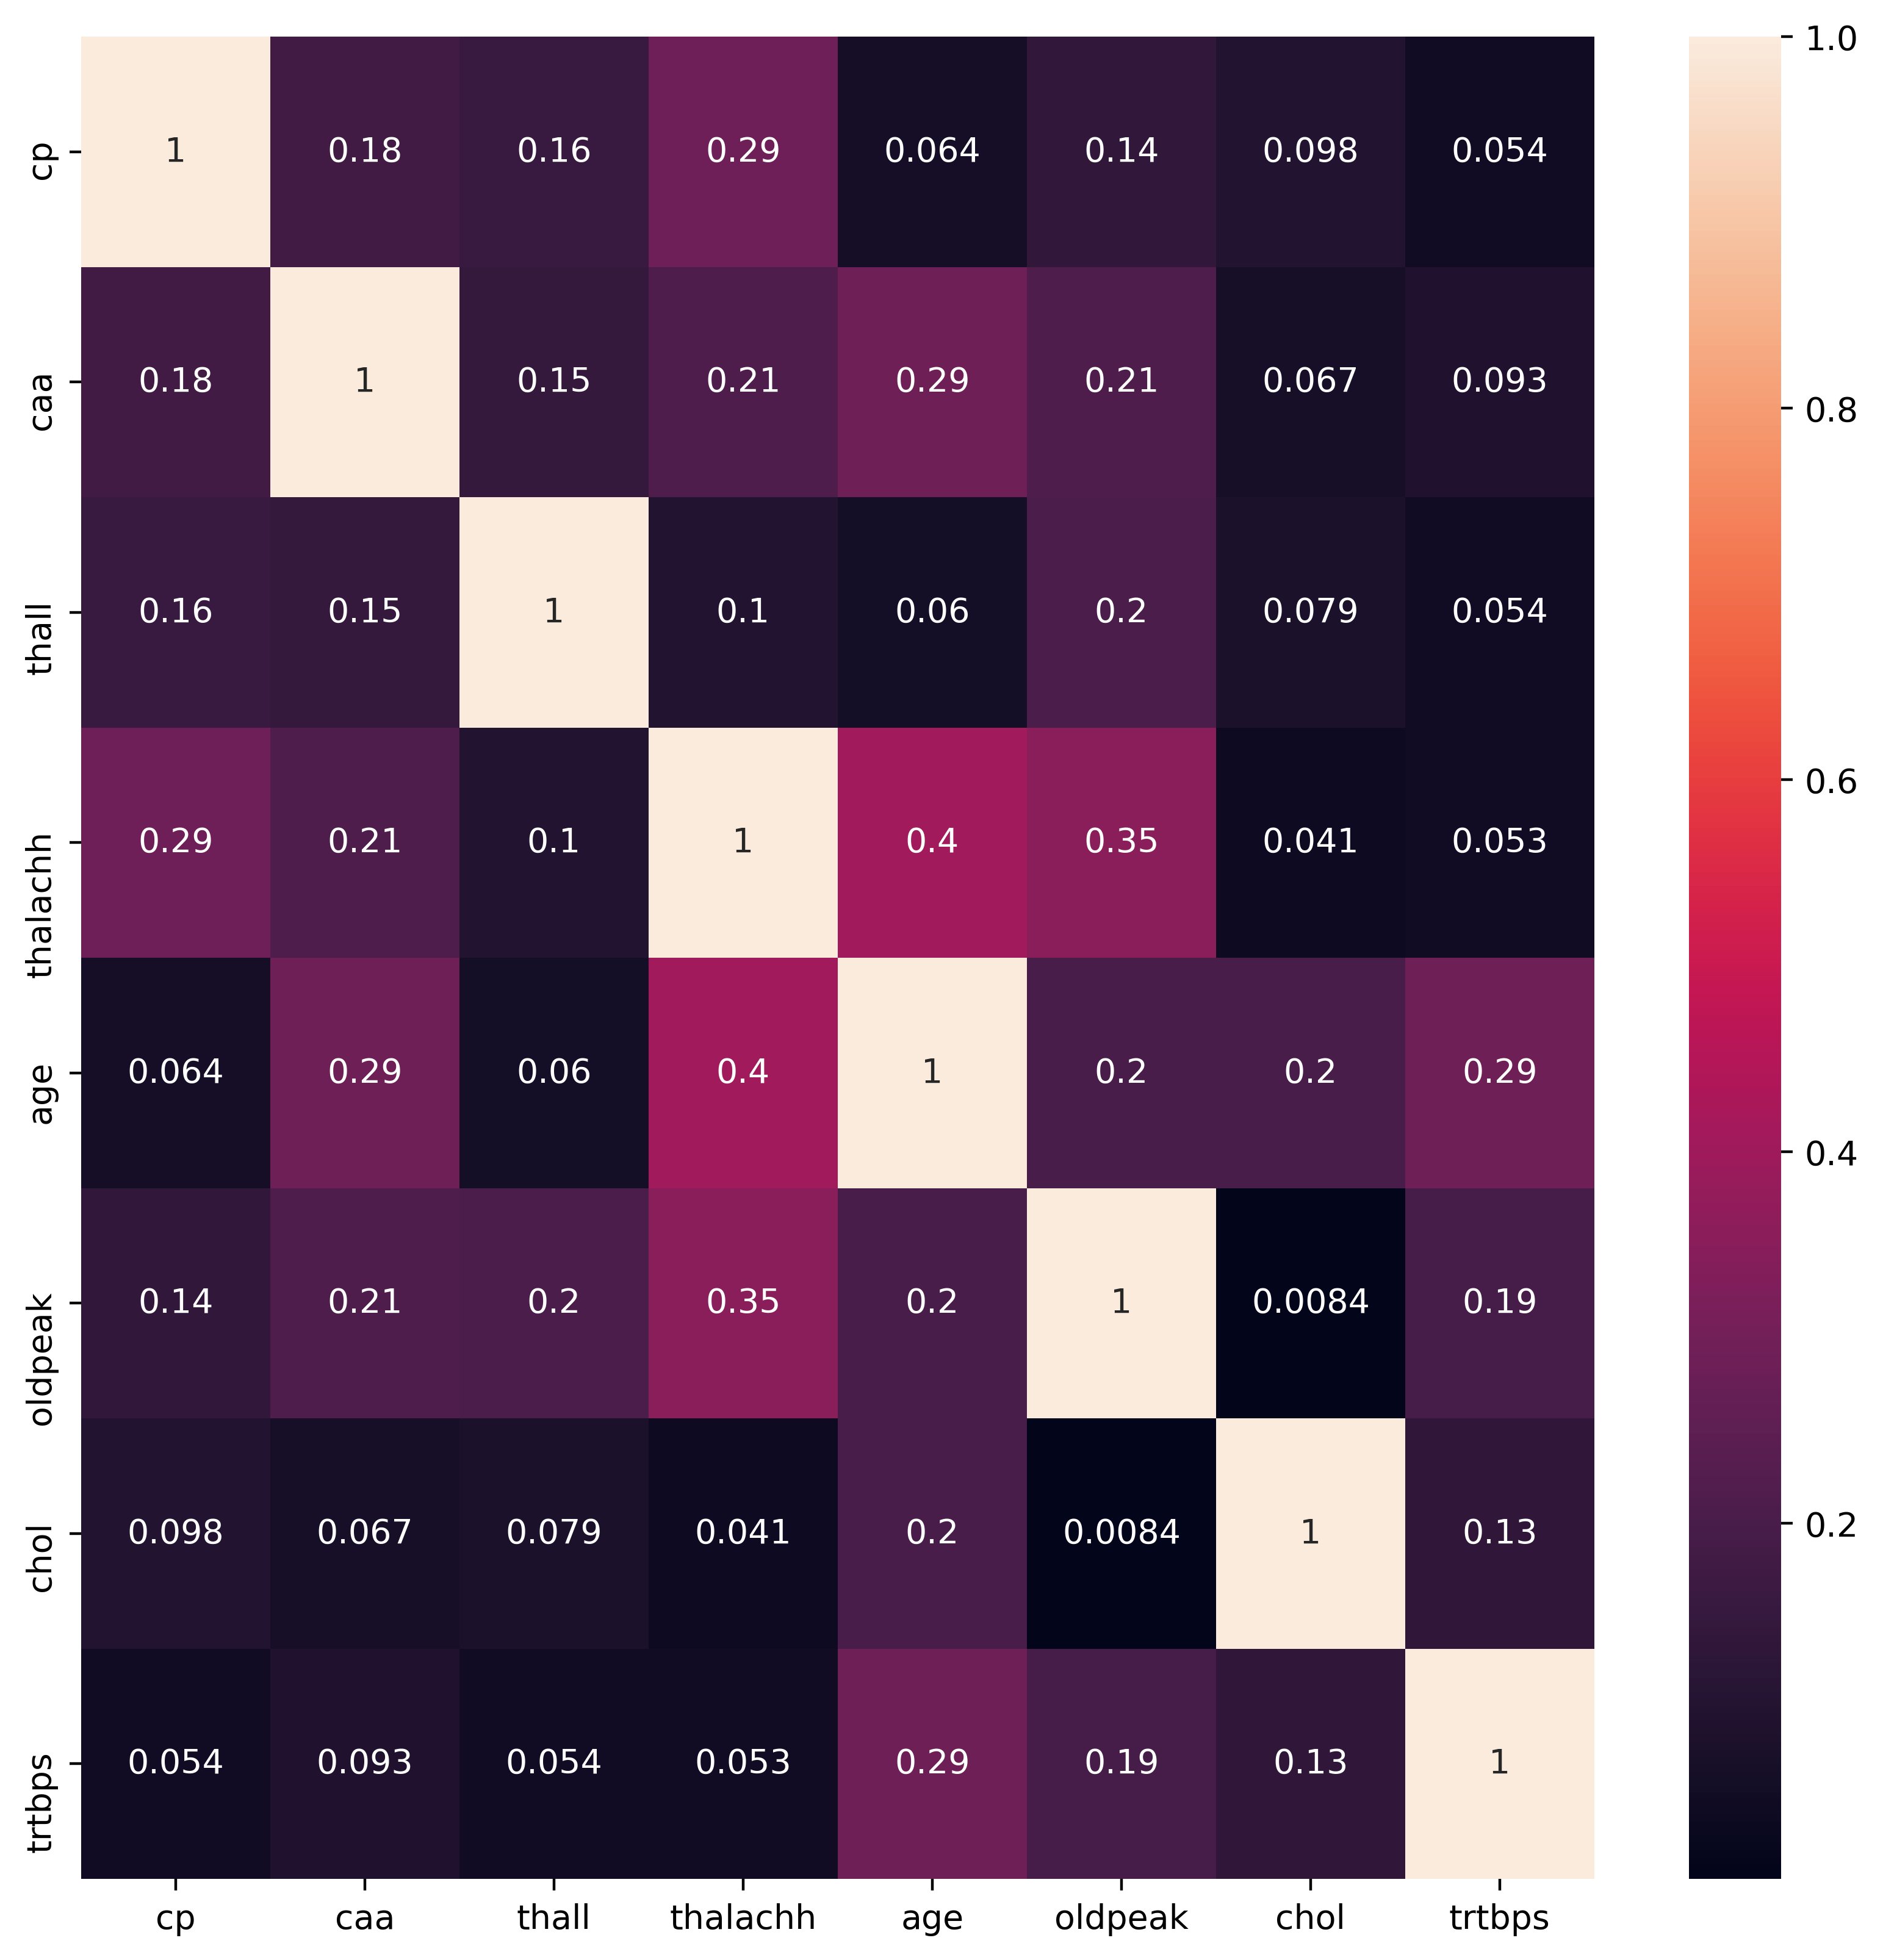

In [36]:
plt.figure(figsize=(10, 10), dpi=400)
sns.heatmap(X_reduced.corr().abs(), annot=True)
#dpi çözünürlük


# Modelling and Fine Tune Model

In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(Xrd_train,yrd_train)
preds=knn.predict(Xrd_test)

In [38]:
#accuracy
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print("Accuracy for knn : {}".format(accuracy_score(yrd_test,preds)))
print("F1 score for knn : {}".format(f1_score(yrd_test,preds)))
print("confusion matrix for knn : {}".format(confusion_matrix(yrd_test,preds)))

Accuracy for knn : 0.7457627118644068
F1 score for knn : 0.7887323943661971
confusion matrix for knn : [[16  9]
 [ 6 28]]


In [39]:
#best k for Knn

train_score=[]
test_score=[]

for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xrd_train,yrd_train)
    
    train_score.append(knn.score(Xrd_train,yrd_train))
    test_score.append(knn.score(Xrd_test,yrd_test))



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


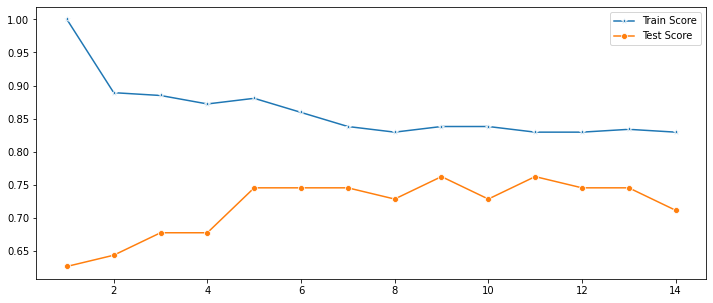

In [40]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_score,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_score,marker='o',label='Test Score')


* The best k is 11

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_2=KNeighborsClassifier(n_neighbors=11)
knn_2.fit(Xrd_train,yrd_train)
preds=knn_2.predict(Xrd_test)

In [42]:
#try with cross vali
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_2,Xrd_train,yrd_train,cv=10,scoring="accuracy")
scores


array([0.75      , 0.875     , 0.875     , 0.91666667, 0.79166667,
       0.95652174, 0.7826087 , 0.91304348, 0.69565217, 0.73913043])

In [43]:
scores.mean()

0.8295289855072465

In [44]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50),'metric':['euclidean','manhattan'],'weights':['uniform','distance']}
knn_3 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn_3,param_grid,cv=5,scoring='accuracy')
knn_cv.fit(Xrd_train,yrd_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8468085106382979
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [45]:
cvres = knn_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
nan {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
nan {'metric': 'euclidean', 'n_neighbors'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)

In [47]:
parameter={'max_leaf_nodes': range(2, 10), 'max_depth': range(1,7), 'min_samples_split' : [2,3,4]}
grid_searchDT = GridSearchCV(dt,parameter,cv=5)
                             
grid_searchDT.fit(Xrd_train,yrd_train)                                  
#preds3=grid_searchDT.predict(Xrd_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 7),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_split': [2, 3, 4]})

In [48]:
grid_searchDT.best_params_

{'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}

In [49]:
grid_searchDT.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, random_state=42)

In [50]:
grid_searchDT.best_score_

0.7872340425531915

In [51]:
#try with cross vali
from sklearn.model_selection import cross_val_score
scores=cross_val_score(grid_searchDT,Xrd_train,yrd_train,cv=10,scoring="accuracy")


In [52]:
scores.mean()

0.7746376811594203

In [53]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42,max_leaf_nodes=8,min_samples_split= 2)
tree.fit(Xrd_train, yrd_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, random_state=42)

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                feature_names=None, impurity=False, filled=True)

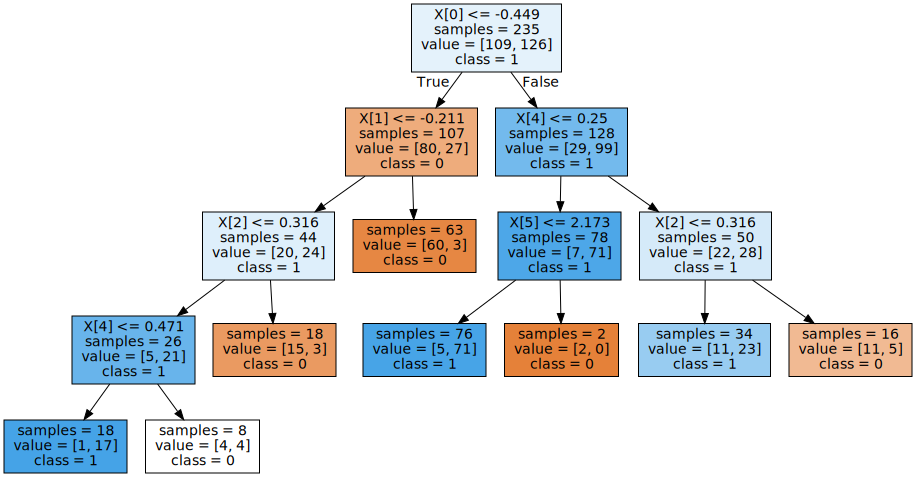

In [55]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [56]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
params=[
       {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
       {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
    

params=GridSearchCV(rf,params,cv=5,scoring='accuracy')
params.fit(Xrd_train,yrd_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='accuracy')

In [58]:
params.best_params_

{'max_features': 4, 'n_estimators': 10}

In [59]:
params.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=10, random_state=42)

In [60]:
params.best_score_

0.8212765957446809

In [61]:
from sklearn.model_selection import cross_val_score
scoresRF=cross_val_score(params,Xrd_train,yrd_train,cv=10,scoring="accuracy")

In [62]:
scoresRF.mean()

0.782608695652174